# Prolation Canon

### introduction
This notebook creates a prolation canon from monophonic input line. It assumes that successive voice durations will be scaled by some increasing power, as specified in the input argument `augmentation_base`, i.e., a base of 2 would create relationships of twice or half as long between staves, a base of 3 relationships of three times or a third, etc.

### imports

In [1]:
import abjad
import pandas as pd

In [2]:
%load_ext abjadext.ipython

### stretch or compress a single container

We use the mutation agent's scale method to compres or expand the durations of some container (in place):

#### doubly augment

In [3]:
container = abjad.Container(r"c' ~ c'16 d'8. e'4 f' ~ \times 4/5 {f'16 c'' c'' ~ c'' c'' ~ } c''2.")
abjad.show(container)

In [4]:
abjad.mutate(container).scale(abjad.Multiplier(2))
abjad.show(container)

In [5]:
abjad.mutate(container).scale(abjad.Multiplier(2))
abjad.show(container)

_Note that this requires the leaves to be rewritten according to a meter when leaf durations don't align with barlines._

#### doubly diminish to return to the starting container

In [6]:
abjad.mutate(container).scale(abjad.Multiplier(1, 2))
abjad.show(container)

In [7]:
abjad.mutate(container).scale(abjad.Multiplier(1, 2))
abjad.show(container)

In [56]:
def prolate_input_container(i, input_container, augmentation_base):
    stretch_factor = augmentation_base/(2**(i+1))
    prolated_copy = abjad.mutate(input_container).copy()
    abjad.mutate(prolated_copy).scale(stretch_factor)
    return prolated_copy

def make_empty_score(num_voices):
    score = abjad.Score()
    for i in range(num_voices):
        score.append(abjad.Staff())
    return score

def fill_staff_with_copies_of_prolated_container(i, staff, prolated_container):
    containers = [abjad.mutate(prolated_container).copy() * (2**i)]
    staff.extend(containers)

def make_prolation_canon(input_container, num_voices, augmentation_base=2):
    score = make_empty_score(num_voices)
    for i, staff in enumerate(reversed(score)):
        prolated_container = prolate_input_container(i, input_container, augmentation_base)
        fill_staff_with_copies_of_prolated_container(i, staff, prolated_container)
    return score

In [57]:
input_container = abjad.Container("c'1 d' e' f'")

In [58]:
abjad.show(input_container)

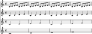

In [59]:
skeleton = make_prolation_canon(input_container, 4)
abjad.show(skeleton)

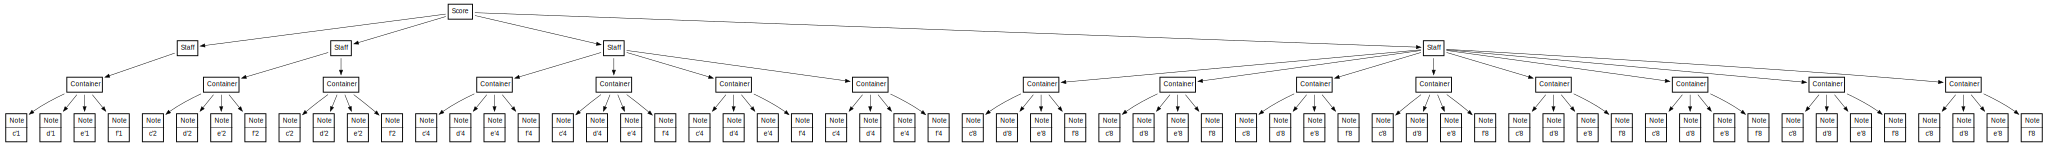

In [41]:
abjad.graph(skeleton)

In [43]:
abjad.play(skeleton)